In [29]:
from config import load_config
import pandas as pd
import pickle
from data_loader import split_data
from select_icl_prompts import active_learn_prompts

config = load_config()

ImportError: cannot import name 'active_learn_prompts' from 'select_icl_prompts' (/Users/kylecox/Documents/ws/time-series-llm/auto-science/select_icl_prompts.py)

In [4]:
data_dict = config['data_dict']
len(data_dict.keys())

20640

In [5]:
train_data, test_icl_data, test_validation_data = split_data(data_dict, 1000, 1000, 500)

In [28]:
prompt_data = active_learn_prompts(train_data, 100)

NameError: name 'active_learn_prompts' is not defined

In [19]:
prompt_data_df = pd.DataFrame(prompt_data).T
prompt_data_df
data_df = pd.DataFrame(data_dict).T
data_df.dropna(inplace=True)
data_df

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Number Households,Median Income ($),Label
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,1.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,0.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


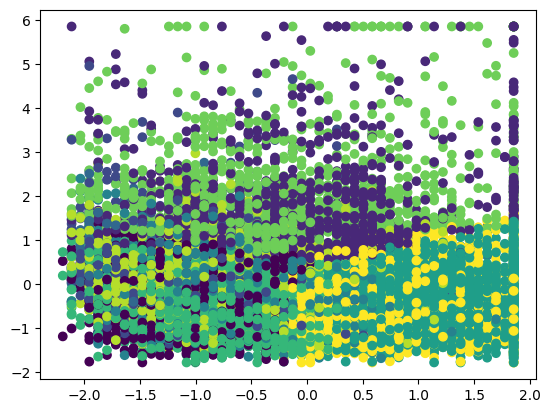

In [27]:
# cluster the data_df in 2-d space from the 8 first columns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_df.iloc[:, :8] = scaler.fit_transform(data_df.iloc[:, :8])
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_df.iloc[:, :8])
data_df['cluster'] = kmeans.labels_
plt.scatter(data_df.iloc[:, 2], data_df.iloc[:, 7], c=data_df['cluster'])